# **Data Preprocessing and BMI Analysis on Survey Responses**
This notebook focuses on the data preprocessing phase of the CRISP-DM methodology, using a dataset of survey responses containing both numerical and categorical variables.

The main goals are:

- Inspect the structure and content of the dataset
- Detect and handle missing values
- Create a new feature (BMI) using height and weight
- Remove outliers using the IQR method
- Explore relationships between BMI and categorical features

This process prepares the dataset for future modeling or health-related insights.


## Initial Exploration and Univariate Analysis (Weight Variable)

We begin by loading the dataset and inspecting its structure.  
Then we perform a univariate analysis of the `Weight` variable, including distribution, skewness, and missing value percentage.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from scipy.stats import chi2_contingency


df = pd.read_csv('responses.csv')
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


In [46]:
# Basic info
df.info()

# Separate numeric and categorical columns
numeric_df = df.select_dtypes(include=np.number)
text_df = df.select_dtypes(include=object)

# Summary statistics
numeric_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [47]:
# Summary for categorical/text variables
text_df.describe()


,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002,1005,1008,1008,1010,1004,1007,1009,1008,1006,1006
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,430,659,399,549,744,593,906,621,754,707,595


**Observation:**  
The dataset contains 11 categorical features and 139 numerical features.


array([[<Axes: title={'center': 'Weight'}>]], dtype=object)

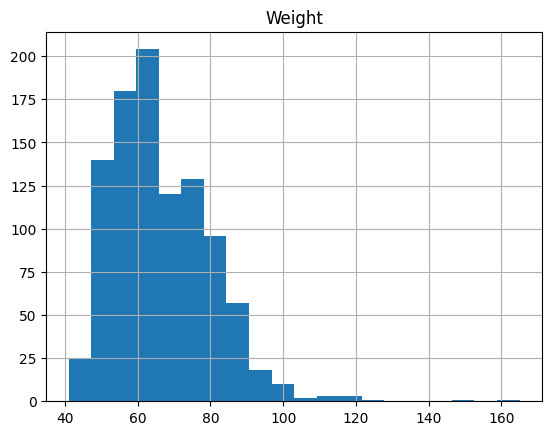

In [48]:
# Histogram of Weight
numeric_df[['Weight']].hist(bins=20)


**Observation:**  
`Weight` is a continuous numerical variable.  
A histogram is appropriate to visualize its distribution.


In [49]:
# Skewness of Weight
numeric_df[['Weight']].skew()


,0
Weight,1.223725


**Observation:**  
`Weight` has a skewness of 1.22, indicating a **right-skewed** distribution, which is also evident in the histogram.


In [50]:
# Null values in Weight
missing_count = numeric_df["Weight"].isnull().sum()
missing_pct = 100 * missing_count / len(numeric_df)

print(f"Missing values: {missing_count}")
print(f"Missing percentage: {round(missing_pct, 2)}%")



Missing values: 20
Missing percentage: 1.98%


## Missing Value Diagnosis and Imputation (Weight)

This section explores whether missing values in the `Weight` variable are associated with other features.  
Numerical and categorical variables are analyzed separately using t-tests and chi-squared tests.  
Then, missing values are imputed using the median due to the skewed distribution.



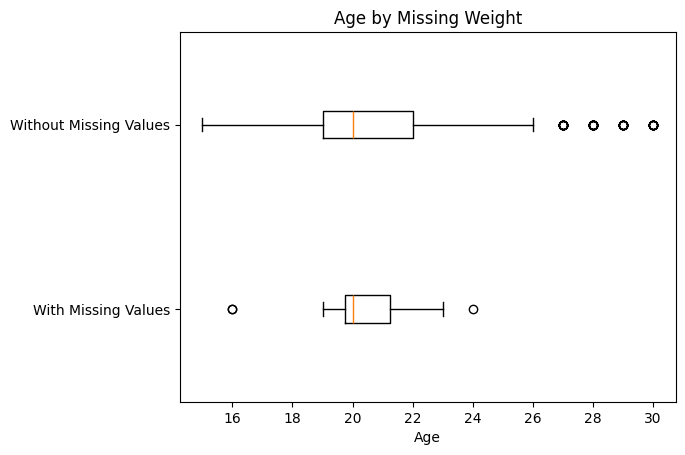

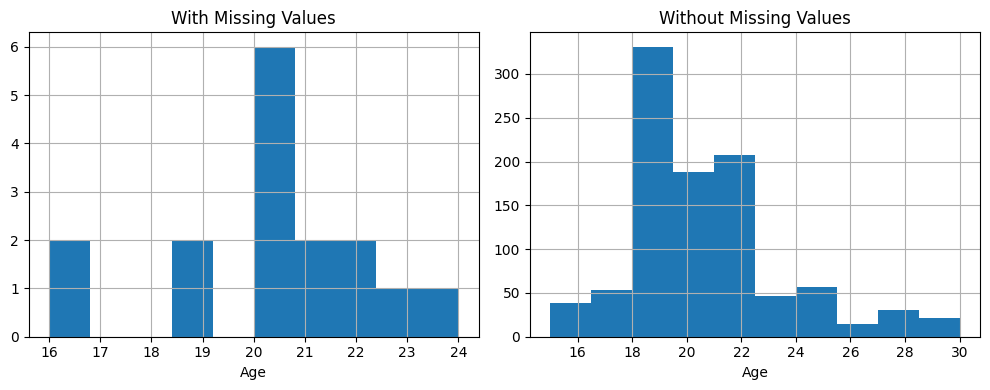

p-value of t-test: 0.7258


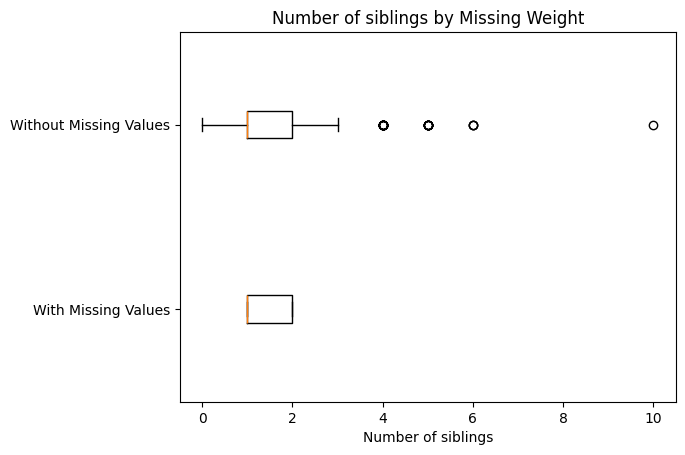

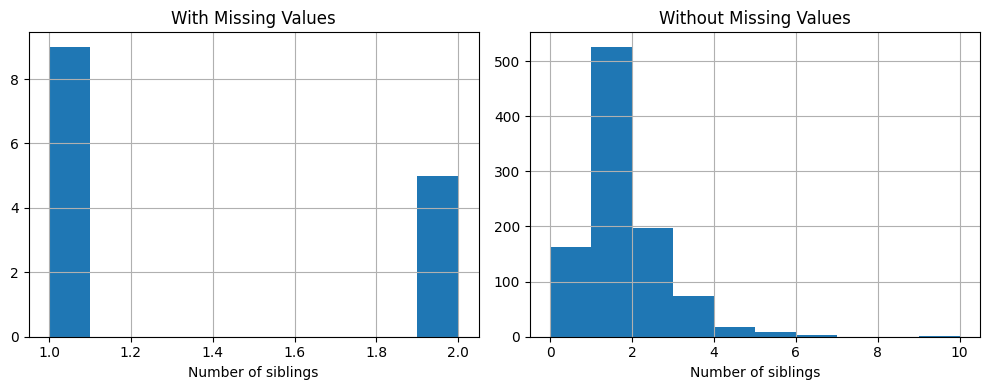

p-value of t-test: 0.8255


In [51]:
from scipy.stats import ttest_ind

def diagnose_mv_numerical(df, feature, mv_mask):
    labels = {True: 'With Missing Values', False: 'Without Missing Values'}

    box_data = [df[mv_mask][feature].dropna(), df[~mv_mask][feature].dropna()]

    plt.boxplot(box_data, vert=False)
    plt.yticks([1, 2], [labels[True], labels[False]])
    plt.xlabel(feature)
    plt.title(f'{feature} by Missing Weight')
    plt.show()

    # Histogram comparison
    plt.figure(figsize=(10, 4))
    for i, condition in enumerate([True, False]):
        subset = df[mv_mask == condition]
        plt.subplot(1, 2, i+1)
        subset[feature].hist()
        plt.xlabel(feature)
        plt.title(labels[condition])
    plt.tight_layout()
    plt.show()

    # T-test
    group1 = df[mv_mask][feature].dropna()
    group2 = df[~mv_mask][feature].dropna()
    p_value = ttest_ind(group1, group2).pvalue
    print(f'p-value of t-test: {p_value:.4f}')

# Apply test on numerical features
diagnose_mv_numerical(df, 'Age', df.Weight.isna())
diagnose_mv_numerical(df, 'Number of siblings', df.Weight.isna())


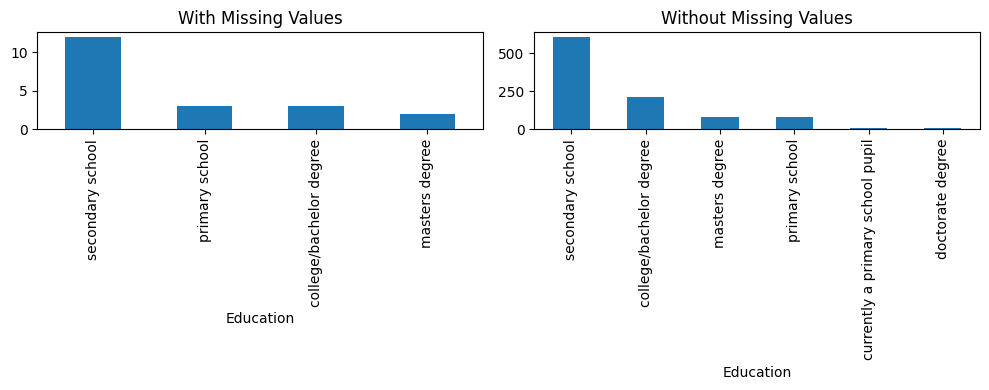

p-value of chi-squared test: 0.8425


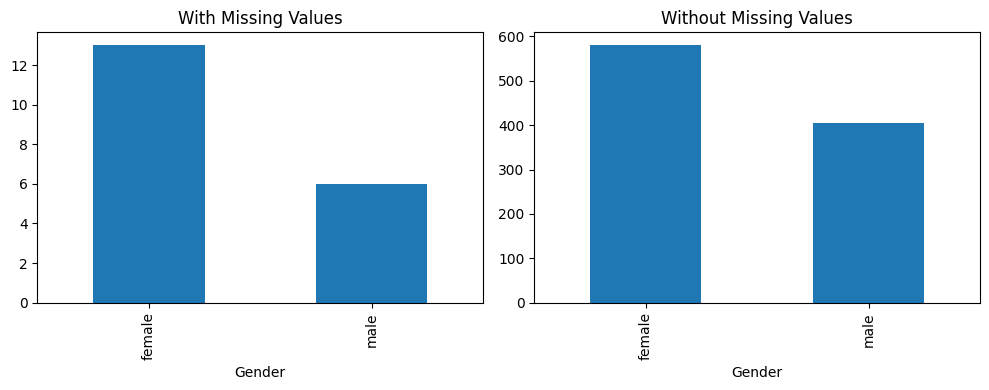

p-value of chi-squared test: 0.5472


In [52]:
def diagnose_mv_categorical(df, feature, mv_mask):
    labels = {True: 'With Missing Values', False: 'Without Missing Values'}

    plt.figure(figsize=(10, 4))
    for i, condition in enumerate([True, False]):
        subset = df[mv_mask == condition]
        plt.subplot(1, 2, i+1)
        subset[feature].value_counts().plot(kind='bar')
        plt.title(labels[condition])
    plt.tight_layout()
    plt.show()

    # Chi-squared test
    contingency = pd.crosstab(mv_mask, df[feature])
    p_value = chi2_contingency(contingency)[1]
    print(f'p-value of chi-squared test: {p_value:.4f}')

# Apply test on categorical features
diagnose_mv_categorical(df, 'Education', df.Weight.isna())
diagnose_mv_categorical(df, 'Gender', df.Weight.isna())


**Interpretation:**  
All p-values are above 0.50. Since the significance threshold is typically 0.05, we conclude that missing values in `Weight` are **not statistically associated** with the selected features.


In [53]:
# Impute missing values in Weight using the median
median_weight = df['Weight'].median()

df['Weight'] = df['Weight'].fillna(median_weight)
numeric_df['Weight'] = numeric_df['Weight'].fillna(median_weight)

print('Remaining NaN values in Weight:', df['Weight'].isna().sum())


Remaining NaN values in Weight: 0


**Imputation Strategy:**  
Due to the strong right-skewed distribution of `Weight`, the median is chosen as the central tendency measure for imputation.


## Outlier Detection and Removal (Weight & Height)

We applied the Interquartile Range (IQR) method to detect and remove outliers in the `Weight` and `Height` variables.  
Boxplots before and after cleaning help visualize the effect of the removal.


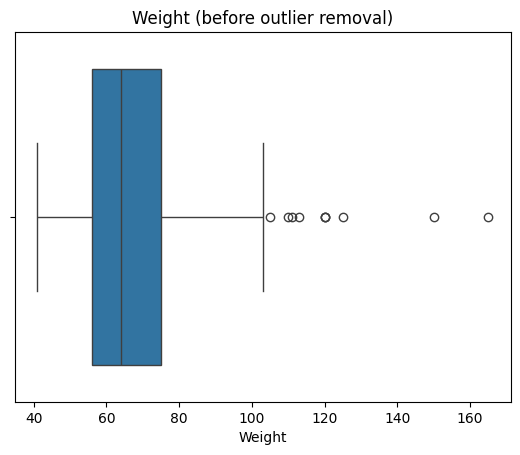

Number of outliers removed (Weight): 10


,Weight
292,120.0
612,110.0
715,111.0
793,120.0
796,113.0
859,125.0
885,165.0
973,120.0
992,150.0
998,105.0


In [54]:
# Boxplot before removing outliers
sns.boxplot(x=df['Weight'])
plt.title("Weight (before outlier removal)")
plt.show()

# IQR-based outlier detection
q1_w = numeric_df['Weight'].quantile(0.25)
q3_w = numeric_df['Weight'].quantile(0.75)
iqr_w = q3_w - q1_w

lower_limit_w = q1_w - 1.5 * iqr_w
upper_limit_w = q3_w + 1.5 * iqr_w

# Filter outliers
outliers_w = numeric_df[(numeric_df['Weight'] < lower_limit_w) | (numeric_df['Weight'] > upper_limit_w)]
outlier_indices_w = outliers_w.index

# Store and remove
df = df.drop(index=outlier_indices_w)
numeric_df = numeric_df.drop(index=outlier_indices_w)

print(f"Number of outliers removed (Weight): {len(outliers_w)}")
outliers_w['Weight']


**Observation:**  
The boxplot shows clear outliers in the `Weight` variable. Using the IQR method, these extreme values are detected and removed from the dataset.


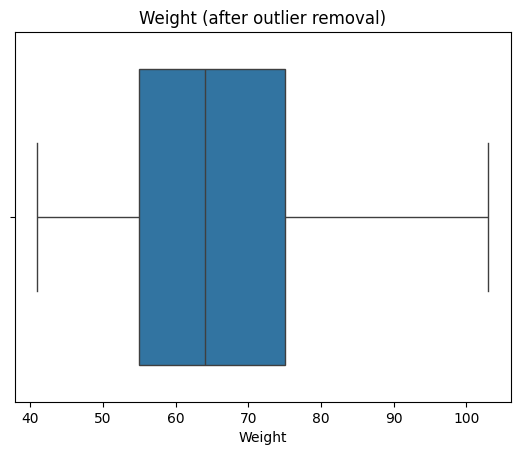

In [55]:
sns.boxplot(x=df['Weight'])
plt.title("Weight (after outlier removal)")
plt.show()


**Observation:**  
After removing the outliers, the distribution of `Weight` appears more concentrated, reducing the influence of extreme values.


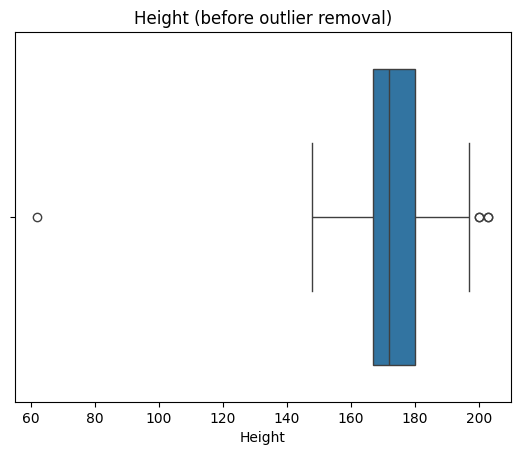

Number of outliers removed (Height): 5


,Height
97,200.0
220,200.0
547,203.0
676,62.0
799,203.0


In [56]:
# Boxplot before removing outliers
sns.boxplot(x=df['Height'])
plt.title("Height (before outlier removal)")
plt.show()

# IQR-based outlier detection
q1_h = numeric_df['Height'].quantile(0.25)
q3_h = numeric_df['Height'].quantile(0.75)
iqr_h = q3_h - q1_h

lower_limit_h = q1_h - 1.5 * iqr_h
upper_limit_h = q3_h + 1.5 * iqr_h

# Filter outliers
outliers_h = numeric_df[(numeric_df['Height'] < lower_limit_h) | (numeric_df['Height'] > upper_limit_h)]
outlier_indices_h = outliers_h.index

# Store and remove
df = df.drop(index=outlier_indices_h)
numeric_df = numeric_df.drop(index=outlier_indices_h)

print(f"Number of outliers removed (Height): {len(outliers_h)}")
outliers_h['Height']


**Observation:**  
The IQR method was applied to the `Height` variable, and several outliers were identified and removed from the dataset.


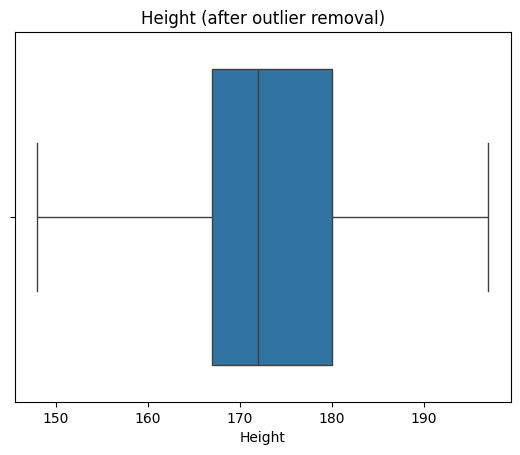

In [57]:
sns.boxplot(x=df['Height'])
plt.title("Height (after outlier removal)")
plt.show()


**Observation:**  
The cleaned `Height` data shows a more compact distribution, free from extreme values.


## Feature Engineering and Analysis: BMI

We calculate the Body Mass Index (BMI) using weight and height (converted from cm to meters).  
Then we clean outliers using the IQR method and analyze its relation with categorical variables.


In [58]:
# Convert height to meters
df['Height'] = df['Height'] / 100
numeric_df['Height'] = df['Height']

# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
numeric_df['BMI'] = df['BMI']

df['BMI'].head()


,BMI
0,18.066167
1,21.829952
2,21.629649
3,19.943213
4,20.415225


**Observation:**  
BMI is calculated as weight (kg) divided by height squared (m²). This new feature helps evaluate individual health based on body proportions.


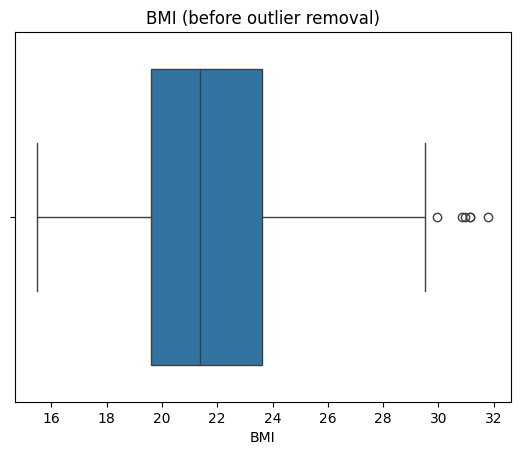

Number of outliers removed (BMI): 6


,BMI
42,31.141869
151,30.864198
156,30.961729
357,29.961612
401,31.141869
636,31.804658


In [59]:
# Boxplot before removing outliers
sns.boxplot(x=df['BMI'])
plt.title("BMI (before outlier removal)")
plt.show()

# IQR method
q1_bmi = df['BMI'].quantile(0.25)
q3_bmi = df['BMI'].quantile(0.75)
iqr_bmi = q3_bmi - q1_bmi

lower_limit_bmi = q1_bmi - 1.5 * iqr_bmi
upper_limit_bmi = q3_bmi + 1.5 * iqr_bmi

# Detect and remove outliers
outliers_bmi = df[(df['BMI'] < lower_limit_bmi) | (df['BMI'] > upper_limit_bmi)]
outlier_indices_bmi = outliers_bmi.index

df = df.drop(index=outlier_indices_bmi)
numeric_df = numeric_df.drop(index=outlier_indices_bmi)

print(f"Number of outliers removed (BMI): {len(outliers_bmi)}")
outliers_bmi['BMI']


**Observation:**  
The IQR method was applied to remove outliers in the BMI distribution. This ensures a more robust analysis in the next steps.


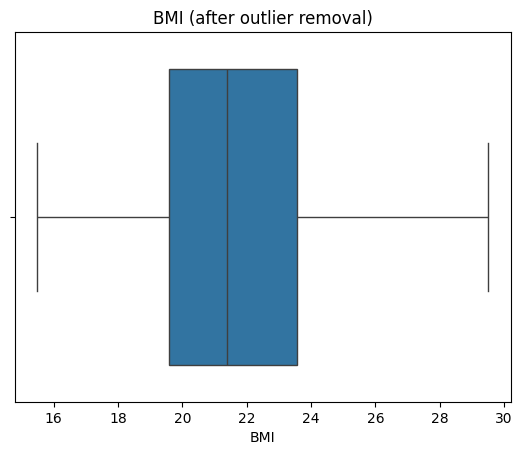

In [60]:
sns.boxplot(x=df['BMI'])
plt.title("BMI (after outlier removal)")
plt.show()


**Observation:**  
The cleaned BMI values show a more compact and reliable distribution.


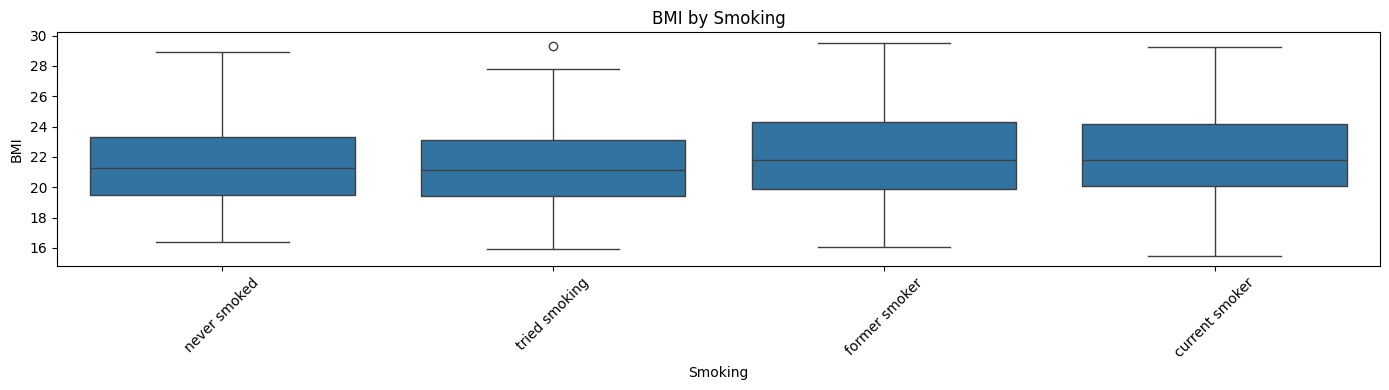

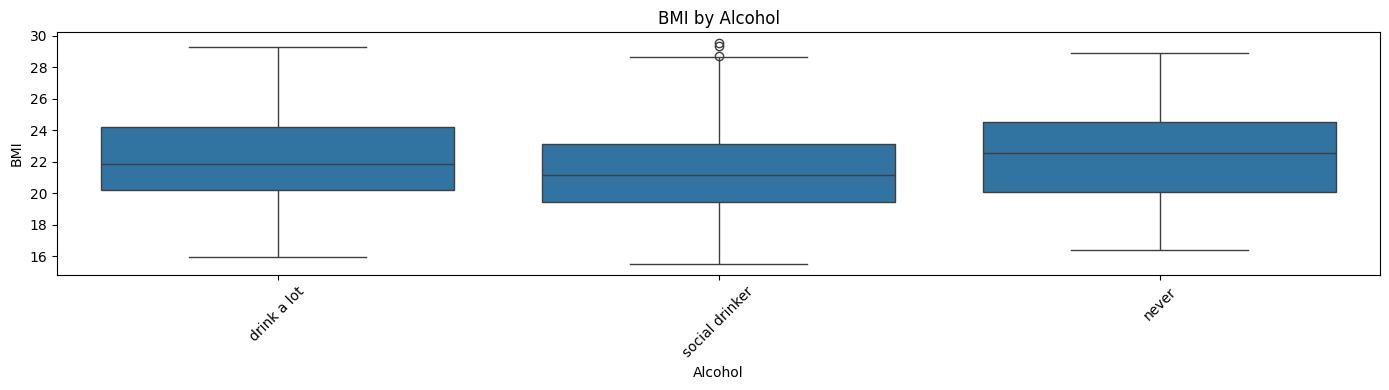

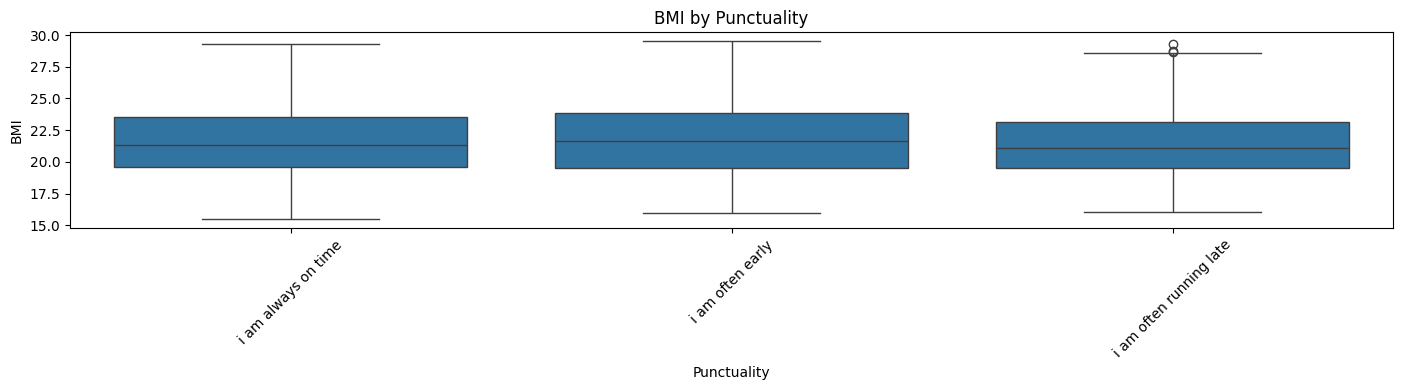

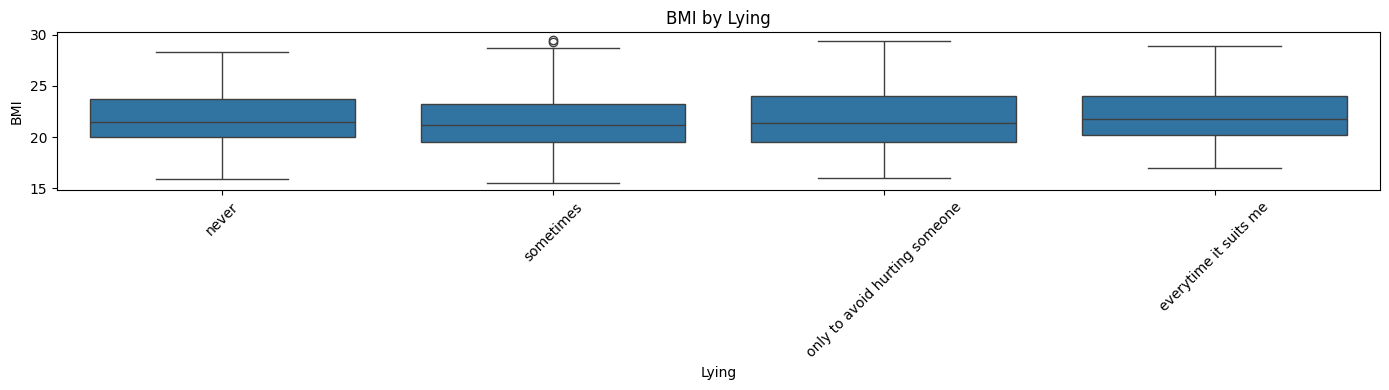

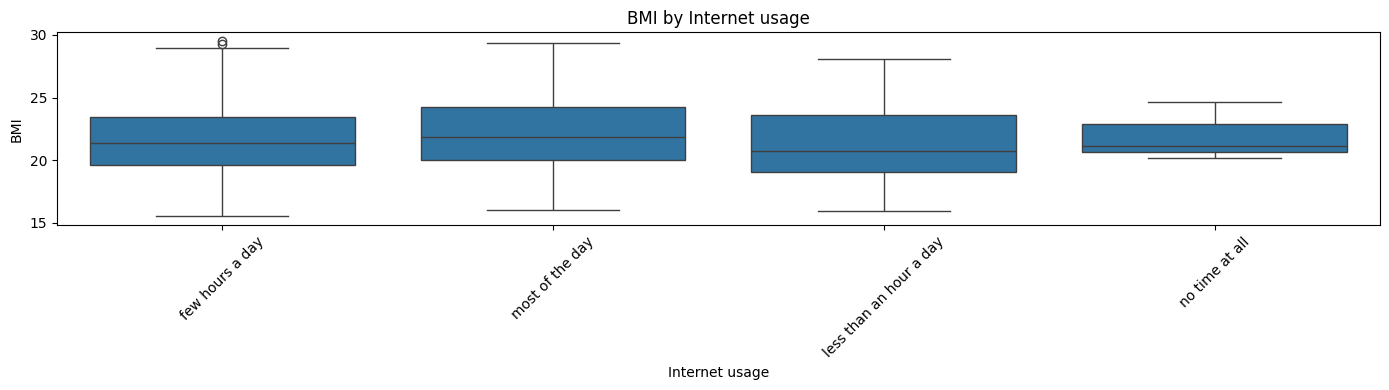

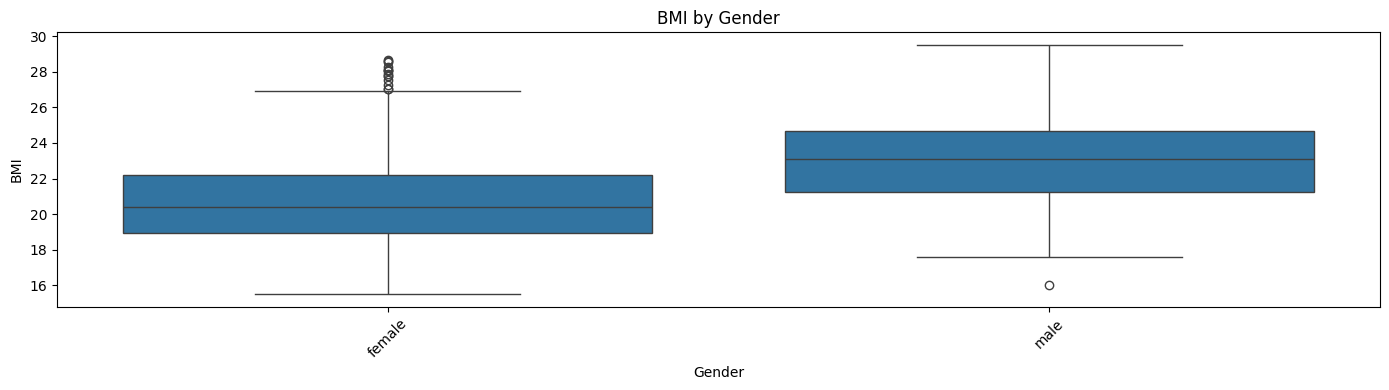

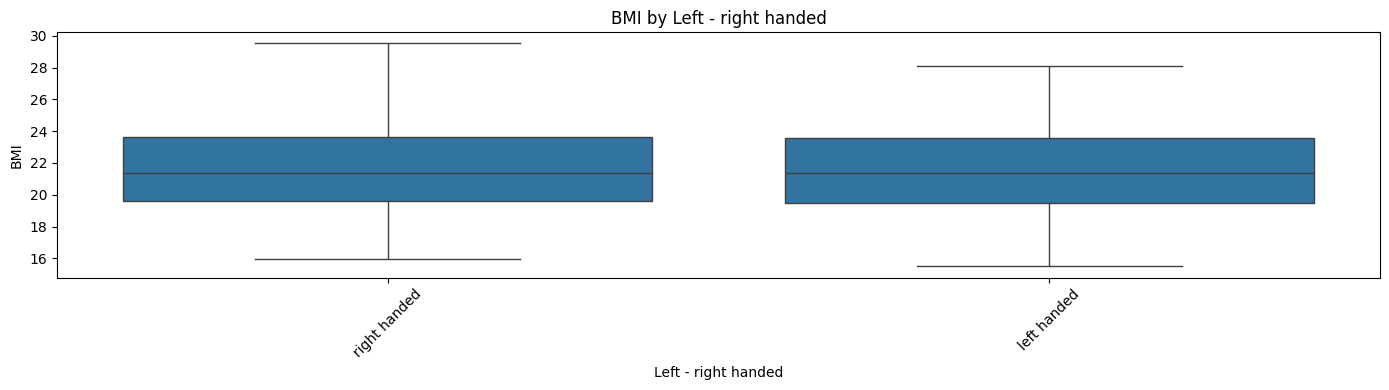

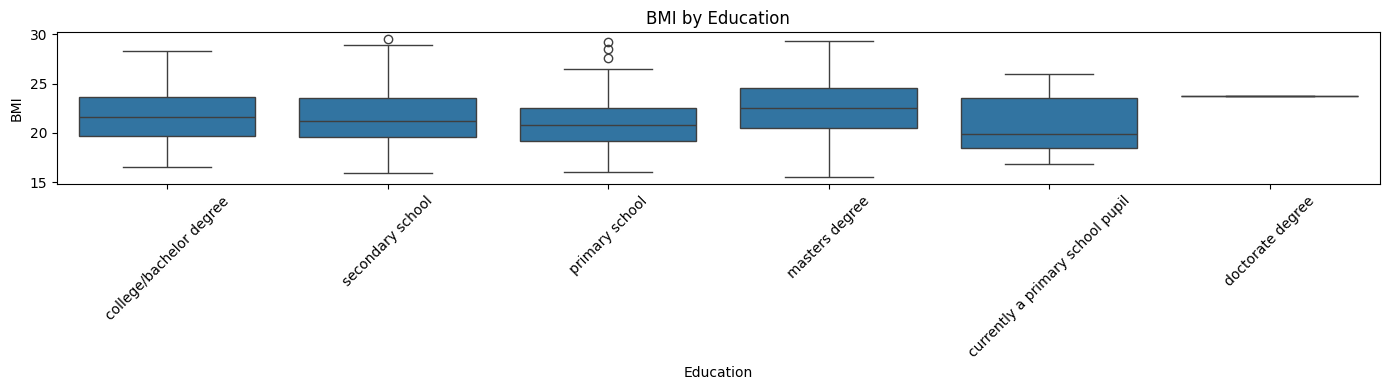

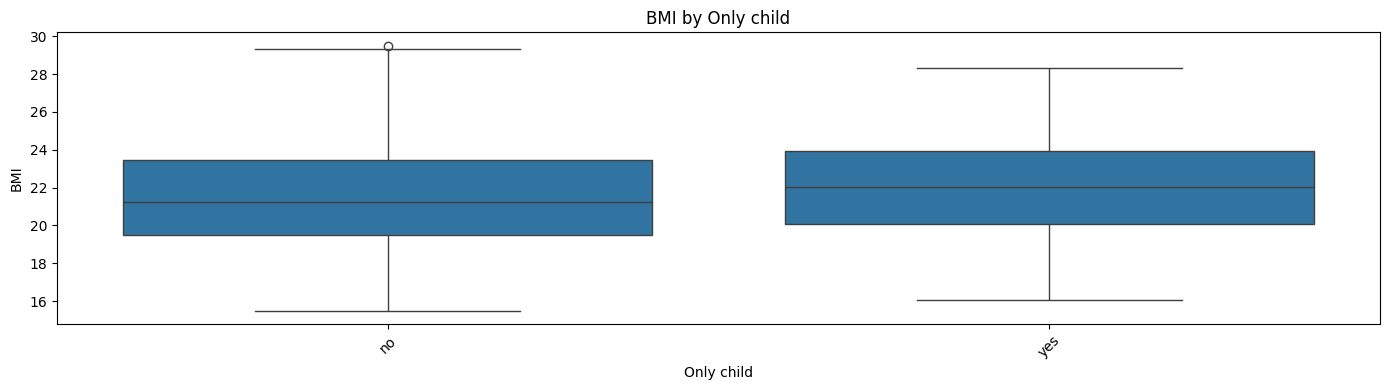

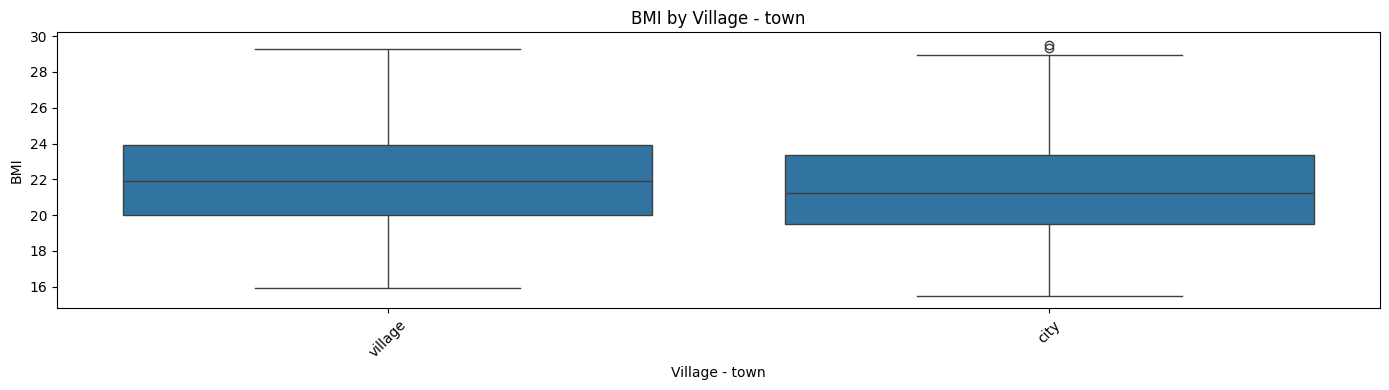

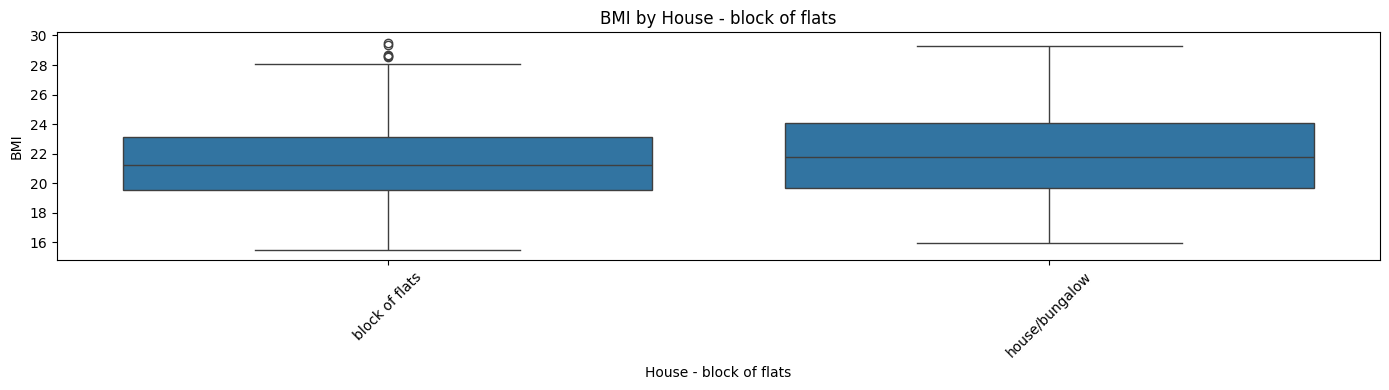

In [61]:
# Analyze BMI by categorical variables
for column in text_df.columns:
    plt.figure(figsize=(14, 4))
    sns.boxplot(data=df, x=column, y='BMI')
    plt.title(f"BMI by {column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Observation:**  
Among the categorical variables, `Education` shows the most noticeable variation in BMI.  
For example, participants with a doctoral degree tend to have higher BMI values.


In this notebook, we successfully applied several data preprocessing techniques:

- Missing values in the `Weight` variable were evaluated and imputed using the median
- Outliers in `Weight`, `Height`, and `BMI` were identified and removed using the IQR method
- Height was converted to meters, and BMI was computed as a new feature
- Boxplots and group comparisons revealed that `Education` may be associated with differences in BMI

These steps help clean and standardize the dataset for future analysis, while also extracting initial insights about health-related variables in the population surveyed.
